# <CENTER>DATA ANALYSIS OF IPL CRICKET DATASET<CENTER>

                                IMPORTING THE NECESSARY LIBRARIES FOR THE PROJECT

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
c=pd.read_csv("deliveries.csv")
c.info()# INFO ABOUT THE DATAFRAME

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

                         U CAN SELECT MATCH ID FROM FROM 1 TO 636

In [4]:
d=c[c["match_id"]==538].drop("match_id",axis=1).reset_index(drop=True)
d.head(10)# Selecting match on which  analysis has to be performed.
print(" \t\t\t\tBALL BY BALL DATA OF THE MATCH SELECTED")
d

 				BALL BY BALL DATA OF THE MATCH SELECTED


,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,Chennai Super Kings,Royal Challengers Bangalore,1,1,DR Smith,BB McCullum,MA Starc,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Chennai Super Kings,Royal Challengers Bangalore,1,2,DR Smith,BB McCullum,MA Starc,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Chennai Super Kings,Royal Challengers Bangalore,1,3,DR Smith,BB McCullum,MA Starc,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
3,1,Chennai Super Kings,Royal Challengers Bangalore,1,4,BB McCullum,DR Smith,MA Starc,0,0,0,4,0,0,0,4,4,NaN,NaN,NaN
4,1,Chennai Super Kings,Royal Challengers Bangalore,1,5,BB McCullum,DR Smith,MA Starc,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2,Royal Challengers Bangalore,Chennai Super Kings,20,2,D Wiese,MA Starc,DJ Bravo,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
240,2,Royal Challengers Bangalore,Chennai Super Kings,20,3,MA Starc,D Wiese,DJ Bravo,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
241,2,Royal Challengers Bangalore,Chennai Super Kings,20,4,D Wiese,MA Starc,DJ Bravo,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
242,2,Royal Challengers Bangalore,Chennai Super Kings,20,5,D Wiese,MA Starc,DJ Bravo,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN


                                         PREPROCESSING OF DATA 

In [5]:
d.fillna(0,inplace=True)
wicket6=[]
for i in d["player_dismissed"]:
    if(i==0):
        wicket6.append(0)
    else:
        wicket6.append(1)
d["wickets"]=wicket6


In [6]:
d["batsman"]=d["batsman"].apply(lambda x: x.upper())
d["non_striker"]=d["non_striker"].apply(lambda x: x.upper())
d["bowler"]=d["bowler"].apply(lambda x:x.upper())

In [7]:
d.head(10)

,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,wickets
0,1,Chennai Super Kings,Royal Challengers Bangalore,1,1,DR SMITH,BB MCCULLUM,MA STARC,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Chennai Super Kings,Royal Challengers Bangalore,1,2,DR SMITH,BB MCCULLUM,MA STARC,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,Chennai Super Kings,Royal Challengers Bangalore,1,3,DR SMITH,BB MCCULLUM,MA STARC,0,0,...,0,0,0,1,0,1,0,0,0,0
3,1,Chennai Super Kings,Royal Challengers Bangalore,1,4,BB MCCULLUM,DR SMITH,MA STARC,0,0,...,4,0,0,0,4,4,0,0,0,0
4,1,Chennai Super Kings,Royal Challengers Bangalore,1,5,BB MCCULLUM,DR SMITH,MA STARC,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,Chennai Super Kings,Royal Challengers Bangalore,1,6,BB MCCULLUM,DR SMITH,MA STARC,0,0,...,0,0,0,4,0,4,0,0,0,0
6,1,Chennai Super Kings,Royal Challengers Bangalore,2,1,DR SMITH,BB MCCULLUM,YS CHAHAL,0,0,...,0,0,0,2,0,2,0,0,0,0
7,1,Chennai Super Kings,Royal Challengers Bangalore,2,2,DR SMITH,BB MCCULLUM,YS CHAHAL,0,0,...,0,0,0,1,0,1,0,0,0,0
8,1,Chennai Super Kings,Royal Challengers Bangalore,2,3,BB MCCULLUM,DR SMITH,YS CHAHAL,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,Chennai Super Kings,Royal Challengers Bangalore,2,4,BB MCCULLUM,DR SMITH,YS CHAHAL,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
Teams=list(d["batting_team"].unique())
Teams1=Teams[0]
Teams2=Teams[1]

in1=d[d["inning"]==1]
bat1=in1["batsman"].unique()

in2=d[d["inning"]==2]
bat2=in2["batsman"].unique()

ball1=in1["bowler"].unique()

ball2=in2["bowler"].unique()

team1=list(bat1)
team2=list(bat2)

In [9]:
for i in list(ball2):
    if(i not in team1):
        team1.append(i)
for i in list(ball1):
    if(i not in team2):
        team2.append(i)

In [10]:
Teamsp1=pd.DataFrame()
Teamsp2=pd.DataFrame()
a1=[1,2,3,4,5,6,7,8,9,10,11]

In [11]:
Teamsp1[Teams1]=team1
Teamsp1["PlayerNo"]=a1
Teamsp2[Teams2]=team2
Teamsp2["PlayerNo"]=a1
Teamsp2.set_index("PlayerNo",inplace=True)
Teamsp1.set_index("PlayerNo",inplace=True)

In [12]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

#                                   <center> PLAYING 11 </center>

In [13]:
multi_table([Teamsp1,Teamsp2])

,Chennai Super Kings
PlayerNo,
1,DR SMITH
2,BB MCCULLUM
3,SK RAINA
4,MS DHONI
5,RA JADEJA
6,F DU PLESSIS
7,DJ BRAVO
8,R ASHWIN
9,MM SHARMA


In [14]:
in1=d[d["inning"]==1]
bat1=in1["batsman"].unique()
in2=d[d["inning"]==2]
bat2=in2["batsman"].unique()


In [15]:
wf1=list(in1["wickets"])
wf2=list(in2["wickets"])

In [16]:
wickets1=[]
sum=0
for i in wf1:
    sum=sum+i
    wickets1.append(sum)
wickets1
in1["WicketsFallen"]=wickets1
# for team2
wickets2=[]
sum=0
for i in wf2:
    sum=sum+i
    wickets2.append(sum)
wickets2
in2["WicketsFallen"]=wickets2

In [17]:
df1=pd.DataFrame()
df2=pd.DataFrame()

In [18]:
ovr1=in1.groupby("over")
wi61=list(ovr1["total_runs"].sum())

ovr2=in2.groupby("over")
wi62=list(ovr2["total_runs"].sum())


In [19]:
wi31=in1.groupby("player_dismissed")
m51=len(wi31.count())
wi31=wi31.first().iloc[1:m51]
wi41=wi31.index
k21=[]
wi51=wi31["over"]
wi51=list(wi51)   


wi32=in2.groupby("player_dismissed")
m52=len(wi32.count())
wi32=wi32.first().iloc[1:m52]
wi42=wi32.index
k22=[]
wi52=wi32["over"]
wi52=list(wi52)   


In [20]:
in11=in1.drop(["inning","batting_team","bowling_team","is_super_over","wide_runs","legbye_runs","noball_runs","penalty_runs","bye_runs","batsman_runs","extra_runs","player_dismissed","dismissal_kind","fielder","wickets","ball"],axis=1)
score1=list(in11["total_runs"])

cscore1=[]
runrate1=[]
sum=0
rr=0
ballcount=1
overcount=1
for i in score1:
    sum=sum+i
    
    rr=sum/overcount
    runrate1.append(rr)
    
    ballcount=ballcount+1
    cscore1.append(sum)
    if(ballcount==7):
        ballcount=1
        overcount=overcount+1
cscore1
in11["Score"]=cscore1
in11["Run Rate"]=runrate1
in11=in11.groupby("over")
print("\t\t\t\t  OVER BY OVER DETAILS : "+  Teams1)
in1["Score"]=cscore1
in1["Run Rate"]=runrate1
in11.last()
in1["Score"]=cscore1
in1["Run Rate"]=runrate1
in11.last().drop(["total_runs"],axis=1)

				  OVER BY OVER DETAILS : Chennai Super Kings


,batsman,non_striker,bowler,WicketsFallen,Score,Run Rate
over,,,,,,
1,BB MCCULLUM,DR SMITH,MA STARC,0,9,9.000000
2,SK RAINA,DR SMITH,YS CHAHAL,1,16,8.000000
3,SK RAINA,DR SMITH,MA STARC,1,17,5.666667
4,DR SMITH,SK RAINA,YS CHAHAL,1,29,7.250000
5,SK RAINA,DR SMITH,HV PATEL,1,38,7.600000
6,DR SMITH,SK RAINA,D WIESE,1,45,7.500000
7,SK RAINA,DR SMITH,HV PATEL,1,47,6.714286
8,DR SMITH,SK RAINA,D WIESE,1,64,8.000000
9,MS DHONI,SK RAINA,HV PATEL,2,74,8.222222


#                               <center>  Creating Score Card For Team 1</center>

In [21]:
score1bat=pd.DataFrame()
score1bat["Batsman"]=bat1
r1=[]
b1=[]
f4_1=[]
s6_1=[]
sr1=[]
bowl1=[]
for i in bat1:
   
    k=d[d["batsman"]==i]
    r1.append(k["total_runs"].sum())
    b1.append(k["total_runs"].count())
    f4_1.append(len(k[k["total_runs"]==4]))
    s6_1.append(len(k[k["total_runs"]==6]))
    sr1.append(k["total_runs"].sum()/k["total_runs"].count()*100)
    mm=k[k["dismissal_kind"]!=0]
    mm=list(mm["bowler"])
    mm=str(mm).replace('[',"").replace(']',"").replace("'","")
    if(mm==""):
        mm="NotOut"
        
    bowl1.append(mm)
score1bat["runs"]=r1
score1bat["balls"]=b1
score1bat["4's"]=f4_1
score1bat["6's"]=s6_1
score1bat["Strike Rate"]=sr1
score1bat["Dismissed By"]=bowl1
score1bat.name=Teams1+" Batting ScoreCard"
print("\t\t" ,score1bat.name)
wiw=len(score1bat["runs"])
wi=len(score1bat[score1bat["Dismissed By"]=="NotOut"])
print("\t\t\t" ,score1bat["runs"].sum() ,"/", wiw-wi )

score1bat

		 Chennai Super Kings Batting ScoreCard
			 181 / 8


,Batsman,runs,balls,4's,6's,Strike Rate,Dismissed By
0,DR SMITH,39,29,3,3,134.482759,HV PATEL
1,BB MCCULLUM,8,6,2,0,133.333333,YS CHAHAL
2,SK RAINA,64,32,4,6,200.000000,YS CHAHAL
3,MS DHONI,14,14,2,0,100.000000,YS CHAHAL
4,RA JADEJA,8,8,1,0,100.000000,IQBAL ABDULLA
5,F DU PLESSIS,34,19,4,1,178.947368,NotOut
6,DJ BRAVO,5,4,1,0,125.000000,IQBAL ABDULLA
7,R ASHWIN,6,4,1,0,150.000000,D WIESE
8,MM SHARMA,2,6,0,0,33.333333,MA STARC
9,A NEHRA,1,1,0,0,100.000000,NotOut


In [22]:
scoreball1=pd.DataFrame()
scoreball1["Bowler"]=ball1
rb1=[]
overs1=[]
wickets1=[]
economy1=[]
maiden1=[]
dots1=[]
for i in ball1:
   
    k=d[d["bowler"]==i]
    rb1.append(k["total_runs"].sum())
    overs1.append(k["over"].nunique())
    overs=k["over"].nunique()
  
    l1=k["dismissal_kind"]!=0
    l2=k["dismissal_kind"]!="run out"
    q2=len(k[l1&l2])


    wickets1.append(q2)
    economy1.append(k["total_runs"].sum()/k["over"].nunique())
    w1=0
    w2=6
    ov=[]
    for j in range(0,overs):
        if(k["total_runs"].sum()==0):
            ov[j]=1
    
    ov2 =np.array(ov,dtype=int)
    
    maiden1.append(ov2.sum())
    dots1.append(len(k[k["total_runs"]==0]))
    
scoreball1["Overs"]=overs1
scoreball1["Runs"]=rb1
scoreball1["Dots"]=dots1
scoreball1["Maiden"]=maiden1
scoreball1["Wickets"]=wickets1
scoreball1["Economy"]=economy1
scoreball1.name=Teams2+" Bowling ScoreCard"

print("\t\t"+scoreball1.name)
scoreball1

		Royal Challengers Bangalore Bowling ScoreCard


,Bowler,Overs,Runs,Dots,Maiden,Wickets,Economy
0,MA STARC,4,29,12,0,1,7.25
1,YS CHAHAL,4,40,11,0,3,10.00
2,HV PATEL,4,29,11,0,1,7.25
3,D WIESE,4,47,7,0,1,11.75
4,IQBAL ABDULLA,4,36,10,0,2,9.00


#     <center>                      ANALYSIS OF 1ST INNINGS</center>

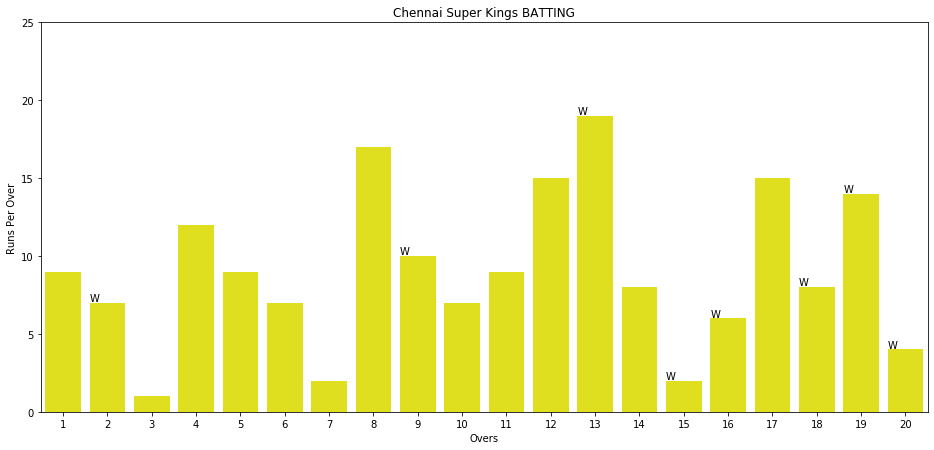

In [23]:
oo1=[]
totalruns1=[]
sum1=0
runsi=[]
for i in range(1,21):
    oo1.append(i)
    sum1=in1[in1["over"]==i]["total_runs"].sum()+sum1
    totalruns1.append(in1[in1["over"]==i]["total_runs"].sum())
    runsi.append(sum1)
df1["Overs"]=oo1
df1["Runs Per Over"]=totalruns1
df1["Runs"]=runsi
df1
plt.figure(figsize=(13,6))
plt.ylim(0,25)
plt.tight_layout()

sns.barplot(x="Overs",y="Runs Per Over",data=df1,color="yellow")
plt.title(Teams1+" BATTING")
for i in wi51:
    if(i==j):
        plt.text(x=i-1.4,y=wi61[i-1]+.1,s="2W")
    else:
        plt.text(x=i-1.4,y=wi61[i-1]+.1,s="W")
    j=i


#  <center>RUN RATE COMPARISION </center>

Text(0.5, 1.0, 'Chennai Super Kings BATTING')

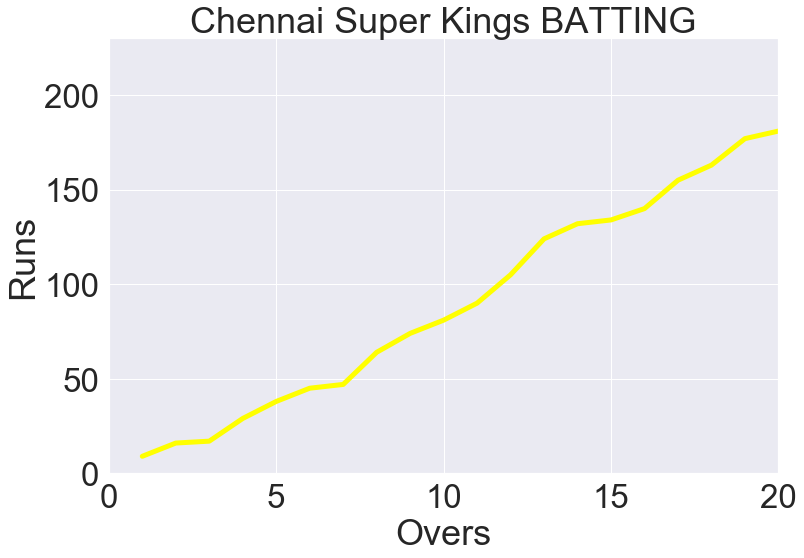

In [24]:
plt.figure(figsize=(12,8))
sns.set(font_scale=3) 
plt.tight_layout()
plt.ylim(0,230)
plt.xlim(0,20)
ax=sns.lineplot(x="Overs",y="Runs",data=df1,lw=5,ls="--",color="Yellow")
plt.title(Teams1+" BATTING")

In [25]:
in1["Overs"]=in1["over"]
runrate1plot=in1.groupby("over")
runrate1plot=runrate1plot.mean()

runrate1plot=runrate1plot.drop(["inning","is_super_over","wide_runs","legbye_runs","noball_runs","penalty_runs","bye_runs","batsman_runs","extra_runs","wickets","ball"],axis=1)
rr1=runrate1plot.drop(["total_runs","WicketsFallen","Score","Overs"],axis=1)
rr1

,Run Rate
over,
1,3.333333
2,6.250000
3,5.444444
4,5.875000
5,6.766667
6,6.888889
7,6.595238
8,7.270833
9,7.796296


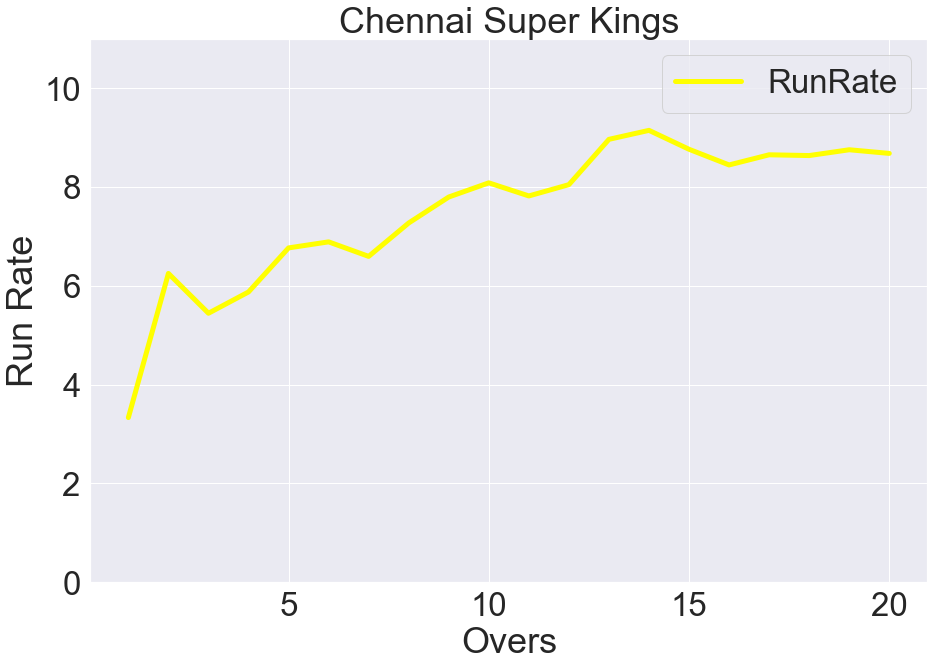

In [26]:
plt.figure(figsize=(15,10))
plt.ylim(0,11)

plt.title(Teams1)
#plt.tight_layout()
sns.lineplot(x="Overs",y="Run Rate",data=runrate1plot,label="RunRate",lw=5,color="Yellow")

# <CENTER>INNINGS 1 BEST BATSMAN<CENTER>

In [27]:
bestbatsman1=list(score1bat.sort_values("runs",ascending=False)["Batsman"])[0]
bestbatsman1
sk=in1[in1["batsman"]==bestbatsman1]

bsk=sk["bowler"].unique()
bestbatsmanb1=pd.DataFrame()
bestbatsmanb1["Bowler"]=bsk
bsk21=[]
for i in bsk:
    bsk21.append(sk[sk["bowler"]==i]["total_runs"].sum())
bestbatsmanb1["Runs"]=bsk21
bestbatsmanb1["Bowler"]=bestbatsmanb1["Bowler"].apply(lambda x:x.upper())
print(bestbatsman1+ " VS " + Teams2)
bestbatsmanb1


SK RAINA VS Royal Challengers Bangalore


,Bowler,Runs
0,YS CHAHAL,23
1,MA STARC,0
2,HV PATEL,11
3,D WIESE,10
4,IQBAL ABDULLA,20


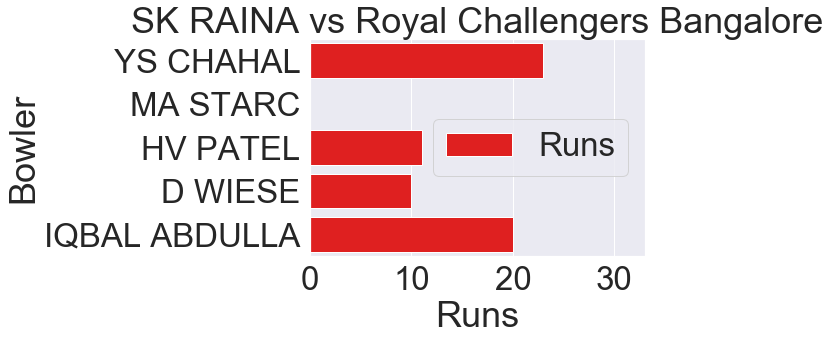

In [28]:
ax=sns.barplot(y="Bowler",x="Runs",data=bestbatsmanb1,orient="h",label="Runs",color='red').legend()
plt.title(bestbatsman1.upper()+ " vs " +Teams2)
plt.xlim(0,bestbatsmanb1["Runs"].max()+10)
sns.set(font_scale=2)

In [29]:
ovs1=in1.groupby("over")
overbyover1=pd.DataFrame()
osat51=[]

osat41=["0-5","6-10","11-15","16-20"]
osat51.append(ovs1.sum().loc[1:5]["total_runs"].sum())
osat51.append(ovs1.sum().loc[6:10]["total_runs"].sum())
osat51.append(ovs1.sum().loc[11:15]["total_runs"].sum())
osat51.append(ovs1.sum().loc[16:20]["total_runs"].sum())
osat51

overbyover1["OVER_RANGE"]=osat41
overbyover1["Runs"]=osat51
print(Teams1 +" Over Comparision")
overbyover1

Chennai Super Kings Over Comparision


,OVER_RANGE,Runs
0,0-5,38
1,6-10,43
2,11-15,53
3,16-20,47


Text(0.5, 1.0, 'Chennai Super Kings Batting')

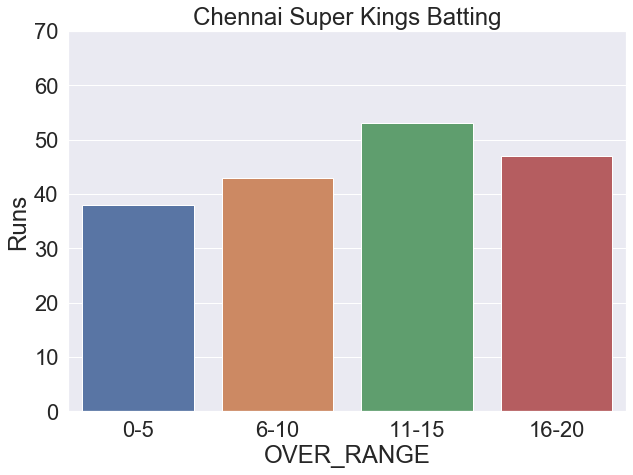

In [30]:
plt.figure(figsize=(10,7))
sns.barplot(x="OVER_RANGE",y="Runs",data=overbyover1)
plt.ylim(0,70)
plt.title(Teams1+ " Batting")

# <center>BEST BOWLER OF INNINGS 1<center>

In [31]:

bestbowler1=in1.groupby("bowler").sum().sort_values(["wickets","total_runs"],ascending=[False,False]).head(1)
bestbowler1=list(bestbowler1.index)[0]
bestbowler1
bbo1=list(in1[in1["bowler"]==bestbowler1].groupby("over").sum()["wickets"])
bbo1
bbo21=list(in1[in1["bowler"]==bestbowler1].groupby("over").sum().index)
bbo21
bbr1=list(in1[in1["bowler"]==bestbowler1].groupby("over").sum()["total_runs"])
bbr1
bbf1=in1[in1["bowler"]==bestbowler1].groupby("over").sum()



(0, 25)

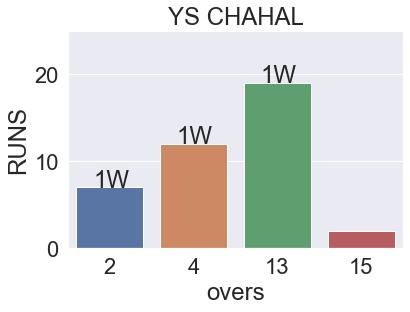

In [32]:
sns.barplot(x=bbo21,y=bbr1,data=bbf1)
plt.xlabel("overs")
plt.ylabel("RUNS")

count2=0
c1=0
for i in bbo1:
    if(i>0):
        plt.text(x=count2-.2,y=bbr1[c1],s=str(i)+"W")
        count2=count2+1
        c1=c1+1
plt.title(bestbowler1.upper())
#plt.tight_layout()
plt.ylim(0,25)

# <center>PATNERSHIPS OF INNINGS1 </center>

In [33]:
mask1=in1["wickets"]==1
mask2=in1["over"]==20 
mask3=in1["ball"]==6
mask2=mask2 & mask3
mask2=mask2 | mask1
pt1=in1[mask2]




(0, 68)

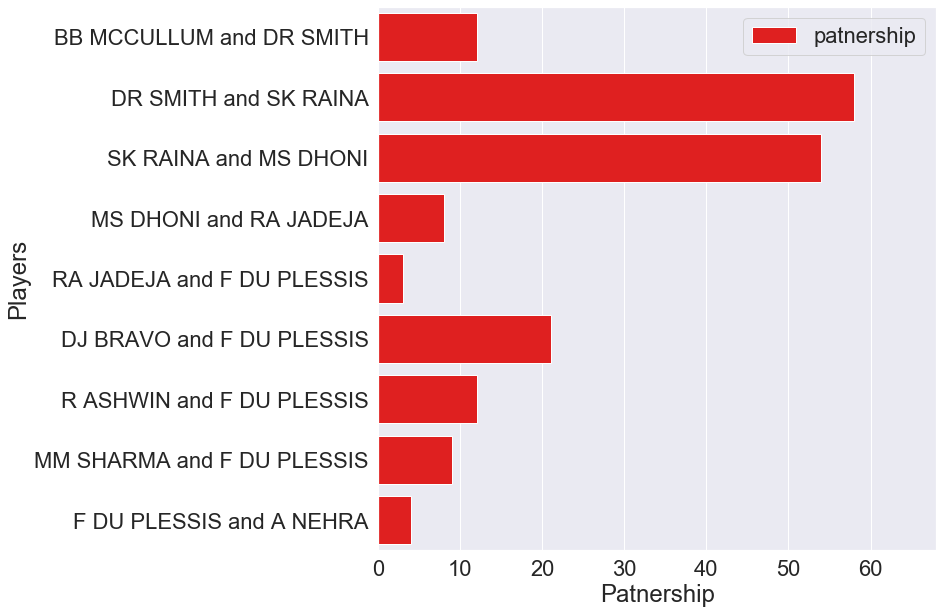

In [34]:
in1["Overs"]=in1["over"]
mask1=in1["wickets"]==1
mask2=in1["over"]==20 
mask3=in1["ball"]==6
mask2=mask2 & mask3
mask2=mask2 | mask1
pt1=in1[mask2]
pt1

patnership1=[]
j=0
pts=list(pt1["Score"])
for i in range(0,len(pts)):
    if(i!=0):
        patnership1.append(pts[i]-pts[i-1])
    else:
         patnership1.append(pts[i])
patnership1


pt1["Patnership"]=patnership1
pt1["Players"]=pt1["batsman"]+ " and "+ pt1["non_striker"]
pt1=pt1.drop(["inning","batting_team","bowling_team","is_super_over","wide_runs","bye_runs","noball_runs","total_runs","legbye_runs","penalty_runs","batsman_runs","extra_runs","player_dismissed","dismissal_kind","fielder","wickets","over","ball","bowler","Overs"],axis=1)
pt1.reset_index(drop=True)
max1=pt1["Patnership"].max()
plt.figure(figsize=(10,10))
sns.barplot(x="Patnership",y="Players",orient="h",data=pt1,label="patnership",color="red").legend()
plt.xlim(0,max1+10)

# <center>RUNS DISTRIBUTION </center>

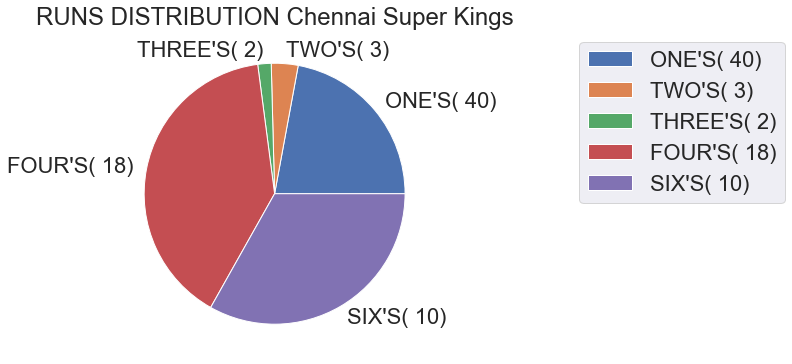

In [35]:
rund1=list(in1["total_runs"])
ones1=[]
two1=[]
three1=[]
four1=[]
six1=[]
dots1=[]

for i in rund1:
    if(i==1):
        ones1.append(i)
    elif(i==2):
        two1.append(i)
    elif(i==3):
        three1.append(i)
    elif(i==4):
        four1.append(i)
    elif(i==6):
        six1.append(i)
    else:
        dots1.append(i+1)
        
ones1=np.array(ones1).sum()
two1=np.array(two1).sum()
three1=np.array(three1).sum()
four1=np.array(four1).sum()
six1=np.array(six1).sum()
dots1=np.array(dots1).sum()


runsdist1=[ones1,two1,three1,four1,six1]

plt.figure(figsize=(10,6))
plt.title("RUNS DISTRIBUTION "+ Teams1)

a=plt.pie(runsdist1,labels=["ONE'S"+"( "+str(runsdist1[0])+")","TWO'S"+"( "+str(int(runsdist1[1]/2))+")","THREE'S"+"( "+str(int(runsdist1[1]/3))+")","FOUR'S"+"( "+str(int(runsdist1[3]/4))+")","SIX'S"+"( "+str(int(runsdist1[4]/6))+")"])
plt.legend(bbox_to_anchor=(1.4, 1))

In [36]:
t1=in1["total_runs"].sum()+1
r1=list(in1.tail(1)["Run Rate"])
r1=round(r1[0],3)

In [37]:
s=("{} requires {} Runs in 20 Overs at {} Runs per Over" ).format(Teams2,t1,r1)
print(s)

Royal Challengers Bangalore requires 182 Runs in 20 Overs at 8.619 Runs per Over


# <center>INNINGS 2<center>

In [54]:
in12=in2.drop(["inning","batting_team","bowling_team","is_super_over","wide_runs","legbye_runs","noball_runs","penalty_runs","bye_runs","batsman_runs","extra_runs","player_dismissed","dismissal_kind","fielder","wickets","ball"],axis=1)
score2=list(in12["total_runs"])

cscore2=[]
runrate2=[]
sum2=0
rr2=0
ballcount2=1
overcount2=1
for i in score2:
    sum2=sum2+i
    
    rr2=sum2/overcount2
    runrate2.append(rr2)
    
    ballcount2=ballcount2+1
    cscore2.append(sum2)
    if(ballcount2==7):
        ballcount2=1
        overcount2=overcount2+1
cscore2
in12["Score"]=cscore2
in12["Run Rate"]=runrate2
in12=in12.groupby("over")
print("\t\t\t  OVER BY OVER DETAILS : "+  Teams2)
in2["Score"]=cscore2
in2["Run Rate"]=runrate2
in12.last()
in2["Score"]=cscore2
in2["Run Rate"]=runrate2
in12.last()

			  OVER BY OVER DETAILS : Royal Challengers Bangalore


,batsman,non_striker,bowler,total_runs,WicketsFallen,Score,Run Rate,Overs
over,,,,,,,,
1,MS BISLA,RR ROSSOUW,IC PANDEY,0,0,8,8.000000,1
2,RR ROSSOUW,MS BISLA,A NEHRA,0,0,12,6.000000,2
3,RR ROSSOUW,MS BISLA,MM SHARMA,4,0,31,10.333333,3
4,RR ROSSOUW,V KOHLI,A NEHRA,0,2,33,8.250000,4
5,KD KARTHIK,V KOHLI,MM SHARMA,0,2,34,6.800000,5
6,KD KARTHIK,V KOHLI,A NEHRA,1,2,38,6.333333,6
7,V KOHLI,KD KARTHIK,MM SHARMA,1,2,44,6.285714,7
8,V KOHLI,KD KARTHIK,R ASHWIN,0,2,61,6.777778,8
9,AB DE VILLIERS,V KOHLI,IC PANDEY,0,3,62,6.200000,9


# <center> ScoreCard </center>

In [39]:
score2bat=pd.DataFrame()
score2bat["Batsman"]=bat2
r2=[]
b2=[]
f4_2=[]
s6_2=[]
sr2=[]
bowl2=[]
for i in bat2:
   
    k=d[d["batsman"]==i]
    r2.append(k["total_runs"].sum())
    b2.append(k["total_runs"].count())
    f4_2.append(len(k[k["total_runs"]==4]))
    s6_2.append(len(k[k["total_runs"]==6]))
    sr2.append(k["total_runs"].sum()/k["total_runs"].count()*100)
    mm=k[k["dismissal_kind"]!=0]
    mm=list(mm["bowler"])
    
    mm=str(mm).replace('[',"").replace(']',"").replace("'","").split(",")[0]
    if(mm==""):
        mm="NotOut"
        
    bowl2.append(mm)
    
score2bat["runs"]=r2
score2bat["balls"]=b2
score2bat["4's"]=f4_2
score2bat["6's"]=s6_2
score2bat["Strike Rate"]=sr2
score2bat["Dismissed By"]=bowl2
score2bat.name="RCB BATTING CARD"
print("\t\t" ,score2bat.name)
wiw2=len(score2bat["runs"])
wi2=len(score2bat[score2bat["Dismissed By"]=="NotOut"])
print("\t\t\t" ,score2bat["runs"].sum() ,"/", wiw2-wi2 )

score2bat


		 RCB BATTING CARD
			 154 / 7


,Batsman,runs,balls,4's,6's,Strike Rate,Dismissed By
0,MS BISLA,17,14,3,0,121.428571,A NEHRA
1,RR ROSSOUW,15,9,1,1,166.666667,A NEHRA
2,V KOHLI,52,43,4,2,120.930233,RA JADEJA
3,KD KARTHIK,10,11,1,0,90.909091,IC PANDEY
4,AB DE VILLIERS,14,10,0,2,140.000000,NotOut
5,SN KHAN,11,7,0,1,157.142857,RA JADEJA
6,D WIESE,26,20,3,1,130.000000,DJ BRAVO
7,HV PATEL,0,1,0,0,0.000000,A NEHRA
8,MA STARC,9,6,1,0,150.000000,NotOut


In [40]:
rb2=[]
overs2=[]
scoreball2=pd.DataFrame()
scoreball2["Bowler"]=ball2
wickets2=[]
economy2=[]
maiden2=[]
dots2=[]
for i in ball2:
   
    k=d[d["bowler"]==i]
    rb2.append(k["total_runs"].sum())
    overs2.append(k["over"].nunique())
    overs=k["over"].nunique()
  
    l1=k["dismissal_kind"]!=0
    l2=k["dismissal_kind"]!="run out"
    q2=len(k[l1&l2])


    wickets2.append(q2)
    economy2.append(k["total_runs"].sum()/k["over"].nunique())
    w1=0
    w2=6
    ov=[]
    for j in range(0,overs):
        if(k["total_runs"].sum()==0):
            ov[j]=1
    
    ov2 =np.array(ov,dtype=int)
    
    maiden2.append(ov2.sum())
    dots2.append(len(k[k["total_runs"]==0]))
    
scoreball2["Overs"]=overs2
scoreball2["Runs"]=rb2
scoreball2["Dots"]=dots2
scoreball2["Maiden"]=maiden2
scoreball2["Wickets"]=wickets2
scoreball2["Economy"]=economy2
scoreball2.name=Teams1

print("\t\t"+scoreball2.name+ " Bowling")
scoreball2

		Chennai Super Kings Bowling


,Bowler,Overs,Runs,Dots,Maiden,Wickets,Economy
0,IC PANDEY,4,21,14,0,1,5.250000
1,A NEHRA,4,11,14,0,4,2.750000
2,MM SHARMA,4,39,8,0,0,9.750000
3,R ASHWIN,1,17,1,0,0,17.000000
4,RA JADEJA,4,37,7,0,1,9.250000
5,DJ BRAVO,3,29,5,0,1,9.666667


# <center>ANALYSIS OF 2ND INNINGS<center>

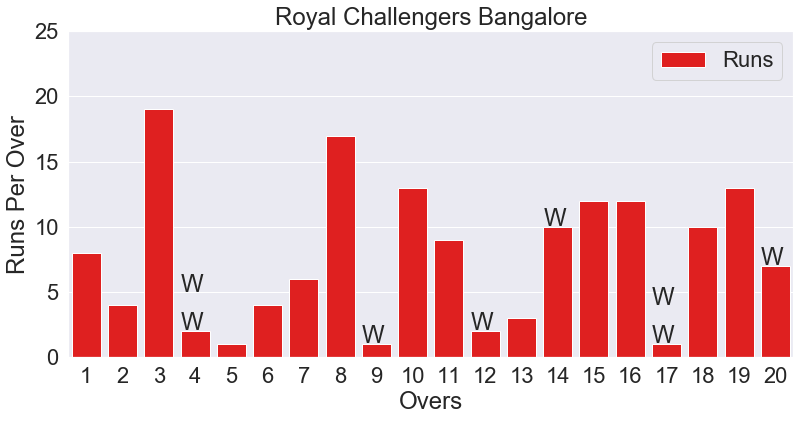

In [41]:
oo2=[]
totalruns2=[]
sum2=0
runsi2=[]
for i in range(1,21):
    oo2.append(i)
    sum2=in2[in2["over"]==i]["total_runs"].sum()+sum2
    totalruns2.append(in2[in2["over"]==i]["total_runs"].sum())
    runsi2.append(sum2)
df2["Overs"]=oo2
df2["Runs Per Over"]=totalruns2
df2["Runs"]=runsi2
df2
plt.figure(figsize=(13,6))
plt.ylim(0,25)
#plt.tight_layout()

sns.barplot(x="Overs",y="Runs Per Over",data=df2,color="red",label="Runs").legend()
plt.title( Teams2)
wi52.sort()
for i in wi52:
    if(i==j):
        plt.text(x=i-1.4,y=wi62[i-1]+3,s="W")
    else:
        plt.text(x=i-1.4,y=wi62[i-1]+.1,s="W")
    j=i

# <CENTER>BEST BATSMAN OF INNINGS2</CENTER>

V KOHLI vs Royal Challengers Bangalore


,Bowler,Runs
0,A NEHRA,4
1,MM SHARMA,3
2,R ASHWIN,12
3,IC PANDEY,4
4,RA JADEJA,18
5,DJ BRAVO,11


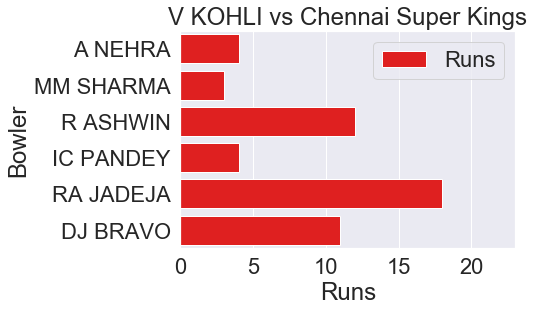

<Figure size 576x576 with 0 Axes>

In [42]:
bestbatsman2=list(score2bat.sort_values("runs",ascending=False)["Batsman"])[0]
bestbatsman2
sk2=in2[in2["batsman"]==bestbatsman2]

bsk2=sk2["bowler"].unique()
bestbatsmanb2=pd.DataFrame()
bestbatsmanb2["Bowler"]=bsk2

bsk22=[]
for i in bsk2:
    bsk22.append(sk2[sk2["bowler"]==i]["total_runs"].sum())
bsk22
bestbatsmanb2["Runs"]=bsk22
bestbatsmanb2["Bowler"]=bestbatsmanb2["Bowler"].apply(lambda x:x.upper())
bestbatsmanb2
bestbatsmanb2["Runs"].max()
ax=sns.barplot(y="Bowler",x="Runs",data=bestbatsmanb2,orient="h",label="Runs",color='RED').legend()
plt.title(bestbatsman2.upper()+ " vs " +Teams1)
plt.xlim(0,bestbatsmanb2["Runs"].max()+5)
sns.set(font_scale=2)
plt.figure(figsize=(8,8))
print(bestbatsman2+" vs "+Teams2)
bestbatsmanb2


In [43]:
ovs2=in2.groupby("over")
overbyover2=pd.DataFrame()
osat52=[]
osat42=["0-5","6-10","11-15","16-20"]
osat52.append(ovs2.sum().loc[1:5]["total_runs"].sum())
osat52.append(ovs2.sum().loc[6:10]["total_runs"].sum())
osat52.append(ovs2.sum().loc[11:15]["total_runs"].sum())
osat52.append(ovs2.sum().loc[16:20]["total_runs"].sum())
osat52
overbyover2["OVER_RANGE"]=osat42
overbyover2["Runs"]=osat52
print(Teams2 +" Over Comparision")
overbyover2

Royal Challengers Bangalore Over Comparision


,OVER_RANGE,Runs
0,0-5,34
1,6-10,41
2,11-15,36
3,16-20,43


Text(0.5, 1, 'Royal Challengers Bangalore Batting')

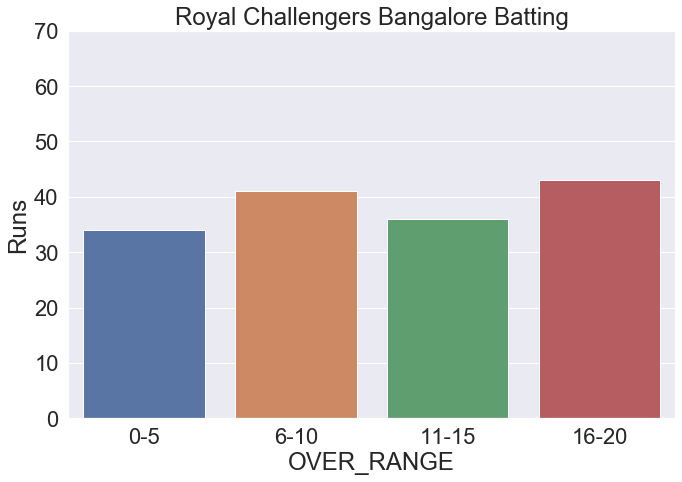

In [44]:
plt.figure(figsize=(10,7))
sns.barplot(x="OVER_RANGE",y="Runs",data=overbyover2)
plt.ylim(0,70)
plt.tight_layout()
plt.title(Teams2+  " Batting")

# <center>BEST BOWLER OF INNINGS2 </center>

(0, 25)

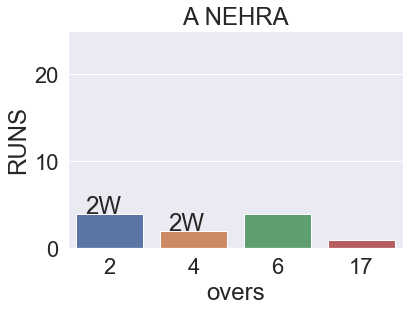

In [45]:

bestbowler2=in2.groupby("bowler").sum().sort_values(["wickets","total_runs"],ascending=[False,False]).head(1)
bestbowler2=list(bestbowler2.index)[0]
bestbowler2
bbr2=list(in2[in2["bowler"]==bestbowler2].groupby("over").sum()["total_runs"])
bbr2
bbo2=list(in2[in2["bowler"]==bestbowler2].groupby("over").sum()["wickets"])
bbo2
bbo21=list(in1[in1["bowler"]==bestbowler1].groupby("over").sum().index)
bbo21
bbo22=list(in2[in2["bowler"]==bestbowler2].groupby("over").sum().index)
bbo22
bbf2=in2[in2["bowler"]==bestbowler2].groupby("over").sum()

sns.barplot(x=bbo22,y=bbr2,data=bbf2)
plt.xlabel("overs")
plt.ylabel("RUNS")

count2=0
c1=0
for i in bbo2:
    if(i>0):
        plt.text(x=count2-.3,y=bbr2[c1],s=str(i)+"W")
        count2=count2+1
        c1=c1+1
    
plt.title(bestbowler2.upper())
#plt.tight_layout()
plt.ylim(0,25)

# <center>RUN RATE COMPARISION </center>

In [46]:
score2=list(in2["total_runs"])
cscore2=[]
runrate2=[]
sum2=0
rr2=0
ballcount2=1
overcount2=1
for i in score2:
    sum2=sum2+i
    
    rr2=sum2/overcount2
    runrate2.append(rr2)
    
    ballcount2=ballcount2+1
    cscore2.append(sum2)
    if(ballcount2==7):
        ballcount2=1
        overcount2=overcount2+1
cscore2
in2["Score"]=cscore2
in2["Run Rate"]=runrate2

In [47]:
in2["Overs"]=in2["over"]
runrate2plot=in2.groupby("over")
runrate2plot=runrate2plot.mean()
runrate2plot

runrate2plot=runrate2plot.drop(["inning","is_super_over","wide_runs","legbye_runs","noball_runs","penalty_runs","bye_runs","batsman_runs","extra_runs","wickets","ball"],axis=1)
rr2=runrate2plot.drop(["total_runs","WicketsFallen","Score","Overs"],axis=1)
rr2

,Run Rate
over,
1,4.666667
2,5.250000
3,7.833333
4,7.958333
5,6.700000
6,6.083333
7,5.904762
8,6.646825
9,6.737037


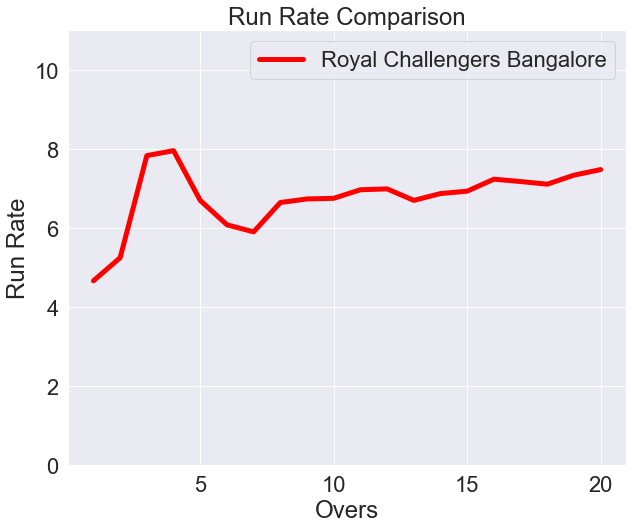

In [48]:
plt.figure(figsize=(10,8))
plt.ylim(0,11)

plt.title("Run Rate Comparison" )
#plt.tight_layout()
sns.lineplot(x="Overs",y="Run Rate",data=runrate2plot,label=Teams2,color="Red",lw=5)
#sns.lineplot(x="Overs",y="Run Rate",data=runrate1plot,label=Teams1,color="Yellow")

# <CENTER>PATNERSHIP</CENTER>

In [49]:
mask12=in2["wickets"]==1
mask22=in2["over"]==20 
mask32=in2["ball"]==6
mask22=mask22 & mask32
mask22=mask22 | mask12
pt2=in2[mask22]
patnership2=[]
j2=0
pts2=list(pt2["Score"])
for i in range(0,len(pts2)):
    if(i!=0):
        patnership2.append(pts2[i]-pts2[i-1])
    else:
         patnership2.append(pts2[i])
patnership2
pt2["Patnership"]=patnership2
pt2["Players"]=pt2["batsman"]+ " and "+ pt2["non_striker"]
pt2=pt2.drop(["inning","batting_team","bowling_team","is_super_over","wide_runs","bye_runs","noball_runs","total_runs","legbye_runs","penalty_runs","batsman_runs","extra_runs","player_dismissed","dismissal_kind","fielder","wickets","over","ball","bowler","Overs"],axis=1)
pt2.reset_index(drop=True,inplace=True)
max2=pt2["Patnership"].max()
pt2

,batsman,non_striker,WicketsFallen,Score,Run Rate,Patnership,Players
0,MS BISLA,RR ROSSOUW,1,31,7.750000,31,MS BISLA and RR ROSSOUW
1,RR ROSSOUW,V KOHLI,2,33,8.250000,2,RR ROSSOUW and V KOHLI
2,KD KARTHIK,V KOHLI,3,61,6.777778,28,KD KARTHIK and V KOHLI
3,V KOHLI,AB DE VILLIERS,4,85,7.083333,24,V KOHLI and AB DE VILLIERS
4,SN KHAN,V KOHLI,5,97,6.928571,12,SN KHAN and V KOHLI
5,V KOHLI,D WIESE,6,123,7.235294,26,V KOHLI and D WIESE
6,HV PATEL,D WIESE,7,123,7.235294,0,HV PATEL and D WIESE
7,D WIESE,MA STARC,8,154,7.333333,31,D WIESE and MA STARC


(0, 41)

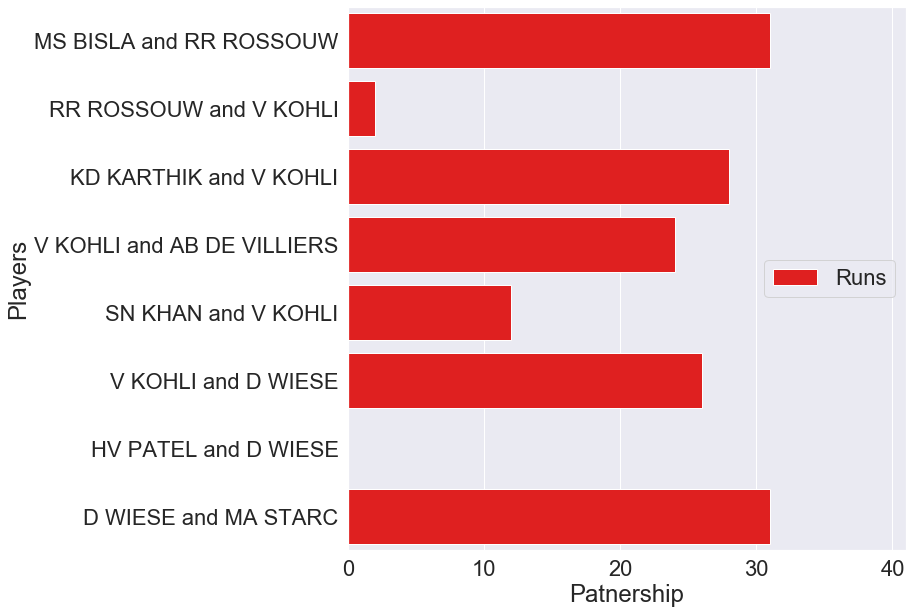

In [50]:
plt.figure(figsize=(10,10))
sns.barplot(x="Patnership",y="Players",orient="h",data=pt2,label="Runs",color="red").legend()
plt.xlim(0,max2+10)

# <CENTER> RUN DISTRIBUTION</CENTER>

In [51]:
rund2=list(in2["total_runs"])
ones2=[]
two2=[]
three2=[]
four2=[]
six2=[]
dots2=[]
for i in rund2:
    if(i==1):
        ones2.append(i)
    elif(i==2):
        two2.append(i)
    elif(i==3):
        three2.append(i)
    elif(i==4):
        four2.append(i)
    elif(i==6):
        six2.append(i)
    else:
        dots2.append(i+1)
        
ones2=np.array(ones2).sum()
two2=np.array(two2).sum()
three2=np.array(three2).sum()
four2=np.array(four2).sum()
six2=np.array(six2).sum()
dots2=np.array(dots2).sum()
runsdist2=[ones2,two2,three2,four2,six2]


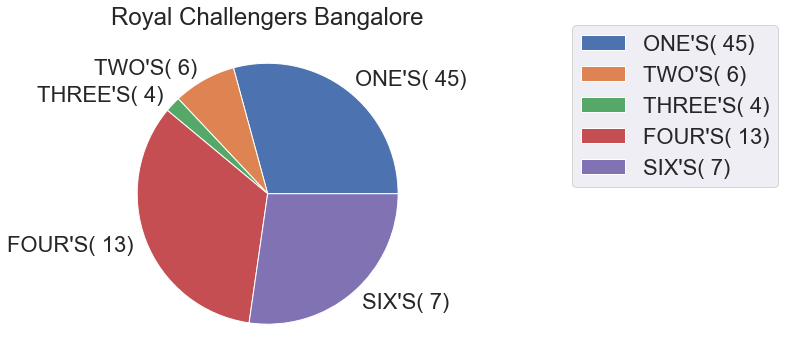

In [52]:
plt.figure(figsize=(10,6))
plt.title(Teams2)

a=plt.pie(runsdist2,labels=["ONE'S"+"( "+str(runsdist2[0])+")","TWO'S"+"( "+str(int(runsdist2[1]/2))+")","THREE'S"+"( "+str(int(runsdist2[1]/3))+")","FOUR'S"+"( "+str(int(runsdist2[3]/4))+")","SIX'S"+"( "+str(int(runsdist2[4]/6))+")"])
plt.legend(bbox_to_anchor=(1.4, 1.05))

In [53]:
s1=score1bat["runs"].sum()
s2=score2bat["runs"].sum()
WICKET1=scoreball1["Wickets"].sum()
WICKET2=scoreball2["Wickets"].sum()
if(s1>s2):
    win=s1-s2
    win1=("{} win by {}").format(Teams1,win)
    print("\t\t\tResult:"+win1)
else:
    
    win2=10-WICKET2
    win2=("{} win by {}").format(Teams2,win2)
    print("\t\t\tResult:"+win2)

			Result:Chennai Super Kings win by 27


<CENTER> THANKS BY SUHAS G</CENTER> 